# This is a jupyter notebook for a test
The model is run and two experiments are performed

In the first experiment carbon tax in Cambodia is shocked

In the next experiment carbon taxes in several countries are shocked. 

For the last experiment an attribution analysis of the shocks are performed. 

To run each cell: press \<shift> \<enter>

To run all: in the menu select \[Cell] [Run All]

# Import modelflow

In [5]:
from modelclass import model
#from ..inject import inject
model.widescreen()


from modeldekom import totdif

# Load model and data, and run 

In [6]:
masia,baseline = model.modelload('../Asia_sep7.pcim',run=1,silent=1,progressbar=1)
#inject(masia)

Solving Asia_7sept:   0%|          | 0/30

# Make experiment with Cambodia

In [7]:
altdf = baseline.copy()
altdf.loc[2021:2021,'KHM_GCARBR_A'] = altdf.loc[2021:2021,'KHM_GCARBR_A'] + 20  
        

altres = masia(altdf,2021,2050,silent=1,first_test = 4,ljit=0,progressbar = 1)

Solving Asia_7sept:   0%|          | 0/30

# Display the impact

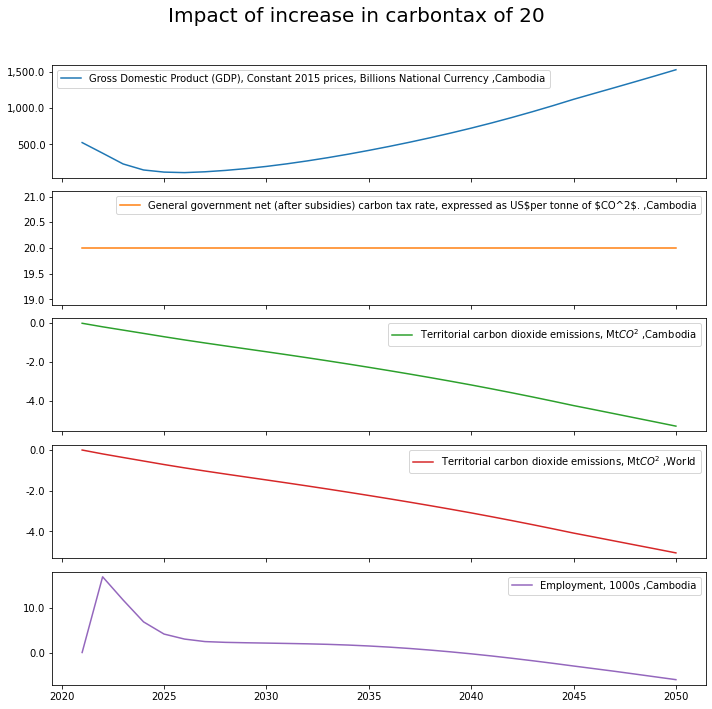

In [8]:
masia['KHM_YER KHM_GCARBR KHM_CO2 WLD_CO2 KHM_LNN'].dif.rename().plot(colrow=1,sharey=0,title='Impact of increase in carbontax of 20');

# Define the same experiment for several countries.
This is just an example, will be wrapped in function later

In [9]:
countries = 'KHM IDN MYS'.split()
altdf = baseline.copy()
for country in countries:
    altdf.loc[2021:2021,country+'_GCARBR_A'] = altdf.loc[2021:2021,country+'_GCARBR_A'] + 20  
        

altres = masia(altdf,2021,2050,silent=1,first_test = 4,ljit=0)

outvar = 'YER CO2 LNN'.split()
displayvar = ' '.join(country+'_'+var for country in countries for var in outvar)+' WLD_CO2'

Solving Asia_7sept:   0%|          | 0/30

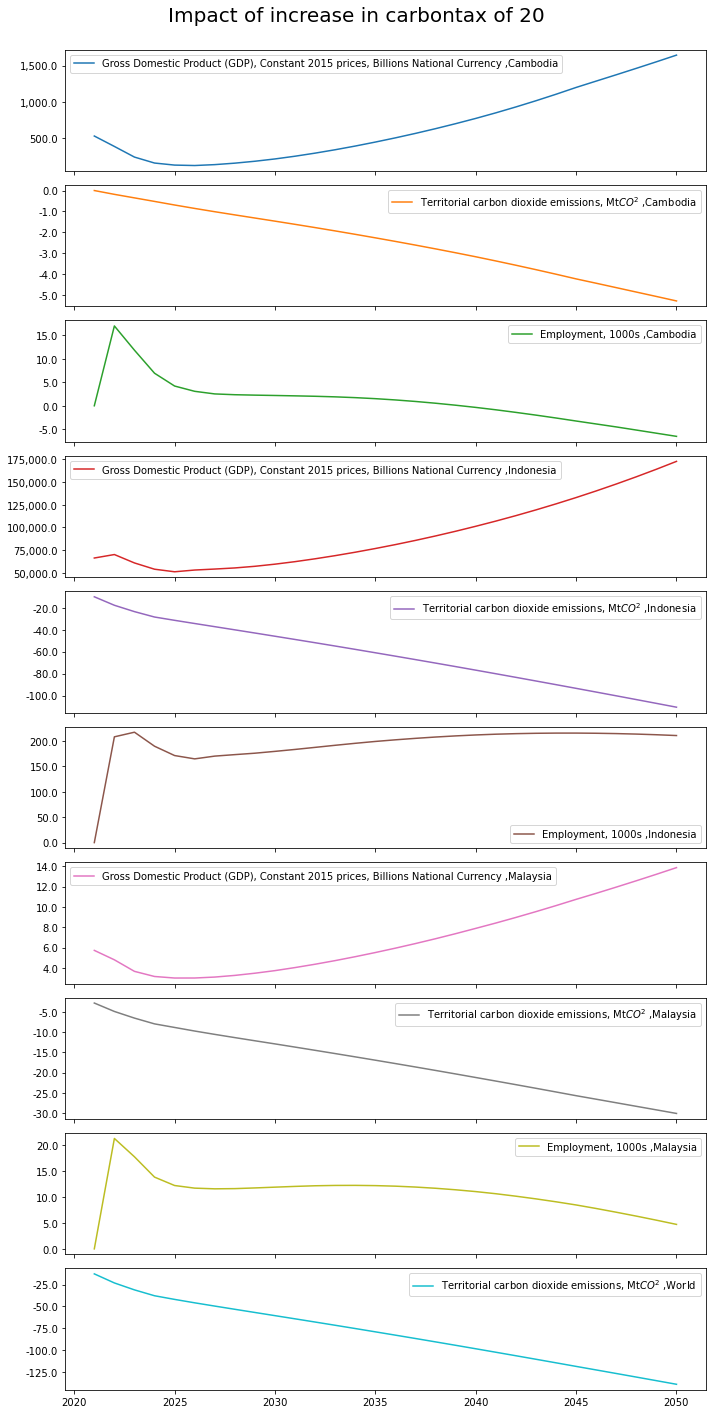

In [10]:
masia[displayvar].dif.rename().plot(colrow=1,sharey=0,top=0.95,title='Impact of increase in carbontax of 20');

In [13]:
experiments = {country : country+'_GCARBR_A' for country in countries}
experiments

{'KHM': 'KHM_GCARBR_A', 'IDN': 'IDN_GCARBR_A', 'MYS': 'MYS_GCARBR_A'}

In [14]:
totalattribution = totdif(masia,experiments=experiments,desdic=masia.var_description)

Solving Asia_7sept:   0%|          | 0/30

Solving Asia_7sept:   0%|          | 0/30

Solving Asia_7sept:   0%|          | 0/30

Total dekomp took       :        19.1 Seconds


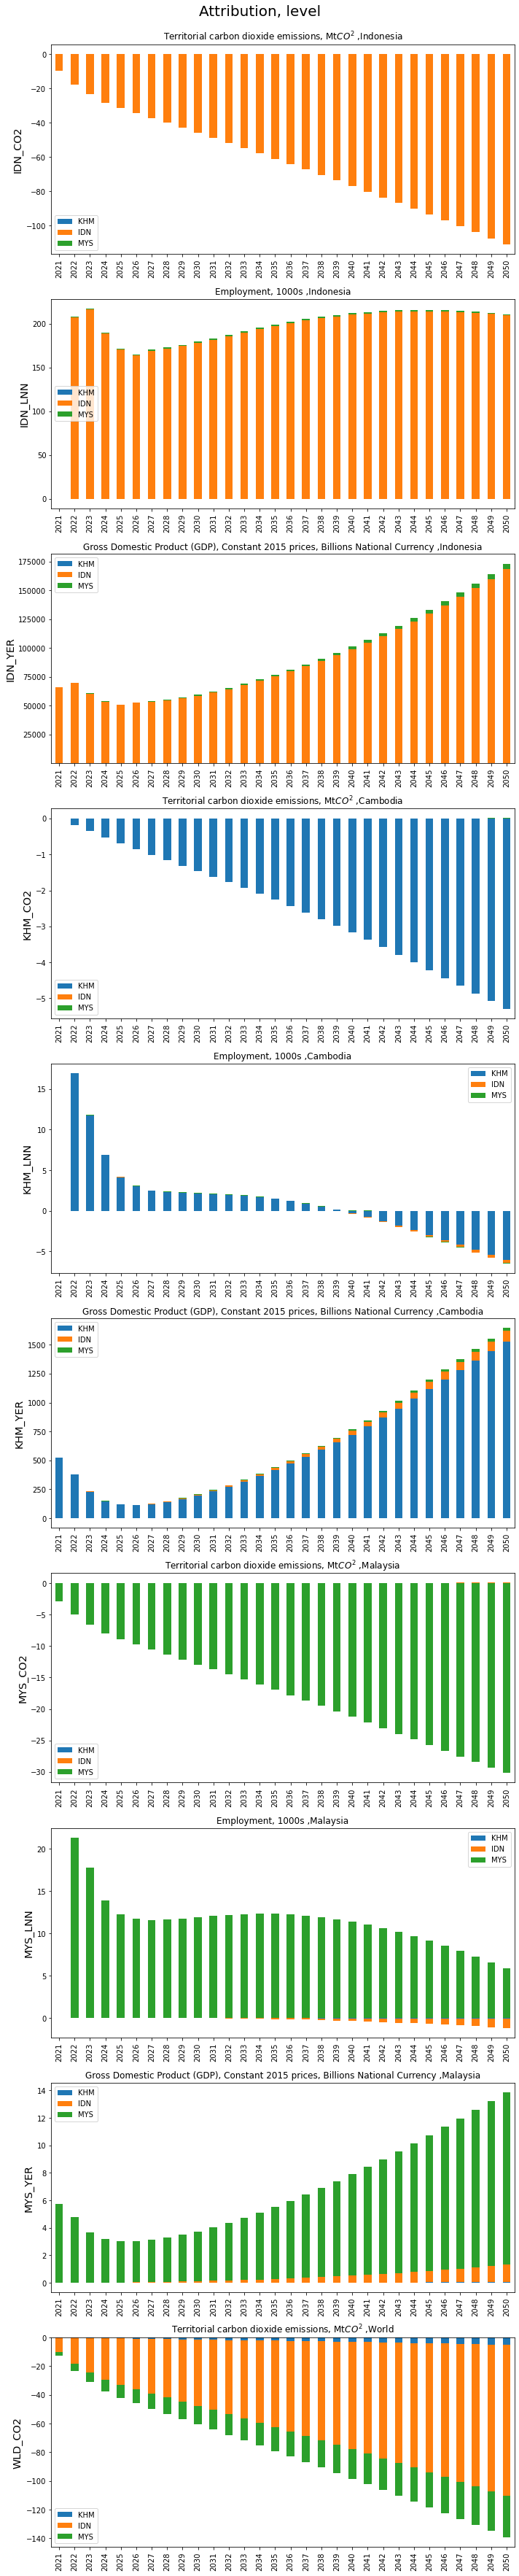

In [15]:
fig = totalattribution.explain_all(displayvar,top=0.965);

# Trace out the formular for world $CO^2$ emision, just for testing 

If a new tab don't show the formula attribution try this link: http://127.0.0.1:5001/

In [16]:
masia.modeldash('WLD_CO2',jupyter=True,show_trigger=False,debug=False) 

C:\Users\bruger\miniconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning: plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.

  warnings.warn(
 * Running on http://127.0.0.1:5001/ (Press CTRL+C to quit)
127.0.0.1 - - [28/Sep/2021 20:36:41] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2021 20:36:41] "GET /_dash-component-suites/dash_renderer/react@16.v1_1_2m1576595738.8.6.min.js HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2021 20:36:41] "GET /_dash-component-suites/dash_renderer/react-dom@16.v1_1_2m1576595738.8.6.min.js HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2021 20:36:41] "GET /_alive_93d0cf0a-a485-4e88-82c1-50c3b8371164 HTTP/1.1" 200 -


Dash app running on http://127.0.0.1:5001/


127.0.0.1 - - [28/Sep/2021 20:36:41] "GET /_dash-component-suites/dash_renderer/prop-types@15.v1_1_2m1576595738.7.2.min.js HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2021 20:36:41] "GET /_dash-component-suites/dash_html_components/dash_html_components.v1_0_1m1576596177.min.js HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2021 20:36:41] "GET /_dash-component-suites/dash_core_components/highlight.v1_3_1m1576595950.pack.js HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2021 20:36:41] "GET /_dash-component-suites/dash_core_components/dash_core_components.v1_3_1m1576595950.min.js HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2021 20:36:42] "GET /_dash-component-suites/dash_core_components/plotly-1.v1_3_1m1576595950.50.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2021 20:36:42] "GET /_dash-component-suites/dash_bootstrap_components/_components/dash_bootstrap_components.v0_12_2m1620178268.min.js HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2021 20:36:42] "GET /_dash-component-suites/dash_renderer/dash_renderer.v1_1_2m157659573